# **Evaluation Metrics in Classification Problems**

Evaluation of a machine learning model is crucial to measure its performance. Numerous metrics are used in the evaluation of a machine learning model. Selection of the most suitable metrics is important to fine-tune a model based on its performance. In this article, we discuss the mathematical background and application of evaluation metrics in classification problems.

We can start discussing evaluation metrics by building a machine learning classification model. Here breast cancer data from sklearn’s in-built datasets is used to build a random forest binary classification model. 

## **Lets Code!**

Import necessary libraries and packages to prepare the required environment.

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 

Load data, split it into train-test set, build and train the model, and make predictions on test data.

In [ ]:
# choose a binary classification problem
data = load_breast_cancer()
# develop predictors X and target y dataframes
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)
# split data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# build a RF model with default parameters
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test) 

### **Confusion Matrix**

Without a clear understanding of the confusion matrix, it is hard to proceed with any of classification evaluation metrics. The confusion matrix provides a base to define and develop any of the evaluation metrics. Before discussing the confusion matrix, it is important to know the classes in the dataset and their distribution.

In [ ]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)', size=14, c='green')
plt.tight_layout(); plt.show()

There are two classes in the dataset. 0 refers to ‘Benign’: a non-cancerous state, we simply denote it as ‘negative’. 1 refers to ‘Malignant’: a cancerous state, we simply denote it as ‘positive’. In the dataset, there are 357 negative cases and 212 positive cases. It is clear that class distribution is highly imbalanced. 

Knowledge of the following terms will be of more use to proceed further with metrics.

True Positive: Actually positive (ground truth), predicted as positive (correctly classified)

True Negative: Actually negative (ground truth), predicted as negative (correctly classified)

False Positive: Actually negative (ground truth), predicted as positive (misclassified)

False Negative: Actually positive (ground truth), predicted as negative (misclassified)

To plot a confusion matrix,

In [ ]:
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])

Here out of 114 total test samples, 72 are True Negatives (TN), 37 are True Positives (TP), 5 are False Negatives (FN), and there are no False Positives (FP).

###**Accuracy**



Accuracy can also be defined as the ratio of the number of correctly classified cases to the total of cases under evaluation. The best value of accuracy is 1 and the worst value is 0.

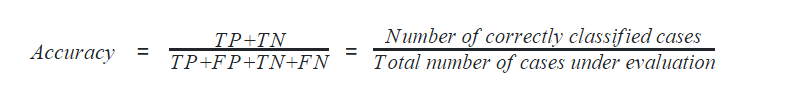

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

It gives 0.956 as output. However, care should be taken while using accuracy as a metric because it gives biased results for data with unbalanced classes. We discussed that our data is highly unbalanced, hence the accuracy score may be a biased one!

### **Precision**

Precision can be defined with respect to either of the classes. The precision of negative class is intuitively the ability of the classifier not to label as positive a sample that is negative. The precision of positive class is intuitively the ability of the classifier not to label as negative a sample that is positive. The best value of precision is 1 and the worst value is 0.

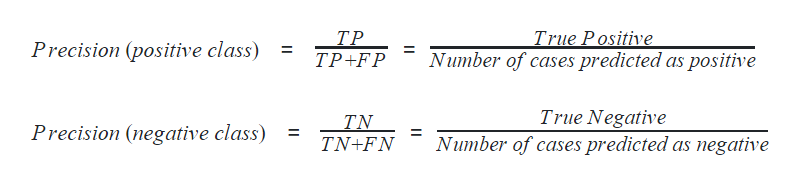

In Python, precision can be calculated using the code,

In [ ]:
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
precision_positive, precision_negative 

### **Recall**

Recall can also be defined with respect to either of the classes. Recall of positive class is also termed sensitivity and is defined as the ratio of the True Positive to the number of actual positive cases. It can intuitively be expressed as the ability of the classifier to capture all the positive cases. It is also called the True Positive Rate (TPR).

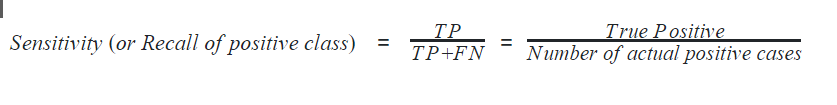

Recall of negative class is also termed specificity and is defined as the ratio of the True Negative to the number of actual negative cases. It can intuitively be expressed as the ability of the classifier to capture all the negative cases. It is also called True Negative Rate (TNR).

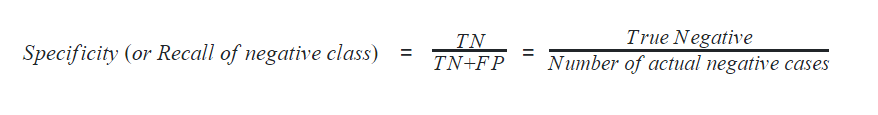

In python, sensitivity and specificity can be calculated as

In [ ]:
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
recall_sensitivity, recall_specificity 

which gives (0.881, 1.000) as output. The best value of recall is 1 and the worst value is 0. 

### **F1-score**

F1-score is considered one of the best metrics for classification models regardless of class imbalance. F1-score is the weighted average of recall and precision of the respective class. Its best value is 1 and the worst value is 0.

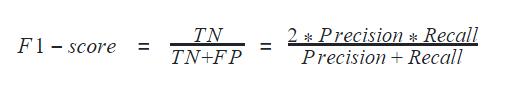

In python, F1-score can be determined for a classification model using

In [ ]:
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=0)
f1_positive, f1_negative 

Accuracy, Precision, Recall, and F1-score can altogether be calculated using the method classification_report in python

In [ ]:
print(metrics.classification_report(y_test, preds))

Here, the macro average of any metric is calculated as the mean of respective values of all classes by giving equal weightage to all classes. On the other hand, the weighted average of any metric is calculated by giving weightage based on the number of data points in respective classes. In the above output, numbers 0 and 1 denote negative and positive classes respectively and column support refers to the number of data points in those classes.

### **ROC and AUC score**

ROC is the short form of Receiver Operating Curve, which helps determine the optimum threshold value for classification. The threshold value is the floating-point value between two classes forming a boundary between those two classes. Here in our model, any predicted output above the threshold is classified as class 1 and below it is classified as class 0.

ROC is realized by visualizing it in a plot. The area under ROC, famously known as AUC is used as a metric to evaluate the classification model. ROC is drawn by taking false positive rate in the x-axis and true positive rate in the y-axis. The best value of AUC is 1 and the worst value is 0. However, AUC of 0.5 is generally considered the bottom reference of a classification model. 

In python, ROC can be plotted by calculating the true positive rate and false-positive rate. The values are calculated in steps by changing the threshold value from 0 to 1 gradually.

In [ ]:
sns.set_style('darkgrid')
preds_train = model.predict(X_train)
# calculate prediction probability
prob_train = np.squeeze(model.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(model.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

Tuning ROC to find the optimum threshold value: Python guides find the right value of threshold (cut-off) with the following codes.

In [ ]:
# creating index
i = np.arange(len(tpr1))
# extracting roc values against different thresholds 
roc = pd.DataFrame({'fpr':fpr1, 'tpr':tpr1, 'tf':(tpr1-1+fpr1), 'thresholds':thresholds1}, index=i)
# top 5 best roc occurrences 
roc.iloc[(roc.tf-0).abs().argsort()[:5]] 

### **Precision-Recall Curve**

To find the best threshold value based on the trade-off between precision and recall, precision_recall_curve is drawn. 

In [ ]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show() 

Trade-off performed by our random forest model between Precision and Recall can be visualized using the following codes:

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(model, X_test, y_test, ax=ax) 

### **Hamming Loss**

Hamming loss is the fraction of targets that are misclassified. The best value of the hamming loss is 0 and the worst value is 1. It can be calculated as 

In [ ]:
hamming_loss = metrics.hamming_loss(y_test, preds)
hamming_loss 

### **Jaccard Score**



Jaccard score is defined as the ratio of the size of the intersection to the size of the union of label classes between predicted labels and ground truth labels. It is considered a similarity coefficient to compare the predicted classes and true classes. The value of 1 denotes the best classification and 0 denotes the worst. Jaccard loss is considered a poor choice if the class distribution is imbalanced.

In [ ]:
jaccard = metrics.jaccard_score(y_test, preds)
jaccard 

### **Cross-entropy loss**

Cross-entropy loss, also known as log loss, becomes famous in deep neural networks because of its ability to overcome vanishing gradient problems. It measures the impurity caused by misclassification. The cross-entropy loss is calculated as the summation of the logarithmic value of prediction probability distribution for misclassified data points. 

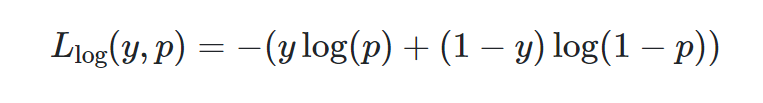

In [ ]:
# Entropy loss
cross_entropy_loss = metrics.log_loss(y_test, prob_test)
cross_entropy_loss 

#**Related Articles:**

> * [Evaluation measures for Classification Problem](https://analyticsindiamag.com/evaluation-metrics-in-ml-ai-for-classification-problems-wpython-code/)
> * [Loss Functions](https://analyticsindiamag.com/hands-on-guide-to-loss-functions-used-to-evaluate-a-ml-algorithm/)
> * [Machine Learning Model Evaluation](https://analyticsindiamag.com/practical-guide-to-machine-learning-model-evaluation-and-error-metrics/)
> * [ROC-AUC Curve - Detailed Explaination](https://analyticsindiamag.com/roc-auc-curve-for-comprehensive-analysis-of-machine-learning-models/)